In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rho_plus as rp

theme, cs = rp.mpl_setup(False)

plt.rcParams['xtick.labelcolor'] = '#6d6d6d'
plt.rcParams['ytick.labelcolor'] = '#6d6d6d'
plt.rcParams['legend.labelcolor'] = plt.rcParams['axes.titlecolor']
plt.rcParams['legend.edgecolor'] = plt.rcParams['axes.facecolor']
plt.rcParams['font.family'] = 'Source Han Sans JP'

In [ ]:
abl_df = pd.DataFrame({
    "Method": ["CAL", "PG1", "AA", "PS", "IRnet-3"],
    "Training Set":     [0.0061, 0.0296, 0.0487, 0.0204, 0.0059],
    "Random Splitting": [0.0851, 0.1206, 0.1299, 0.0903, 0.0837],
    "Covariate Shift":  [0.0856, 0.1230, 0.1226, 0.1030, 0.0832],
    "Prior Shift":      [0.1564, 0.3609, 0.2548, 0.1729, 0.1676],
    "Relation Shift":   [0.0781, 0.1111, 0.1027, 0.0839, 0.0822]
})

In [69]:
data = pd.read_feather('mpc_full_feats_scaled_split.feather')
data

comp    0-norm    2-norm    3-norm    5-norm    7-norm   10-norm  \
0           In1 -2.544139  4.304959  4.099305  3.846319  3.738150  3.663704   
1           Mg1 -2.544139  4.304959  4.099305  3.846319  3.738150  3.663704   
2           Be1 -2.544139  4.304959  4.099305  3.846319  3.738150  3.663704   
3           Hf1 -2.544139  4.304959  4.099305  3.846319  3.738150  3.663704   
4            P1 -2.544139  4.304959  4.099305  3.846319  3.738150  3.663704   
...         ...       ...       ...       ...       ...       ...       ...   
84185   Sb2W1O6 -0.302404  0.587564  0.680144  0.747711  0.764994  0.771629   
84186  Sr1Hf1O3 -0.302404 -0.032556  0.033257  0.130844  0.170592  0.193219   
84187  Rb1Ta1O3 -0.302404 -0.032556  0.033257  0.130844  0.170592  0.193219   
84188  Ba1Ni1O3 -0.302404 -0.032556  0.033257  0.130844  0.170592  0.193219   
84189   Mn1C1O3 -0.302404 -0.032556  0.033257  0.130844  0.170592  0.193219   

       minimum Number  maximum Number  range Number  ...  infoY_delta_e  \
0            2.864847        0.010989     -1.760193  ...          False   
1           -0.041846       -1.664706     -1.760193  ...          False   
2           -0.670320       -2.027018     -1.760193  ...          False   
3            4.671710        1.052637     -1.760193  ...          False   
4            0.193832       -1.528839     -1.760193  ...          False   
...               ...             ...           ...  ...            ...   
84185       -0.356083        1.143215      1.446811  ...          False   
84186       -0.356083        1.052637      1.349629  ...          False   
84187       -0.356083        1.097926      1.398220  ...          False   
84188       -0.356083        0.328012      0.572174  ...          False   
84189       -0.513201       -1.075948     -0.836965  ...          False   

       statY_bandgap  infoY_bandgap  Rsplt1  Rsplt2  Rsplt3  Rsplt4  Rsplt5  \
0              False          False   False   False   False   False   False   
1              False          False   False    True   False   False    True   
2              False          False   False   False   False   False   False   
3              False          False   False   False   False   False   False   
4              False          False   False   False   False   False   False   
...              ...            ...     ...     ...     ...     ...     ...   
84185          False          False   False   False   False   False   False   
84186          False          False   False   False   False   False   False   
84187          False          False   False   False   False   False   False   
84188          False          False   False   False   False   False   False   
84189          False          False   False   False   False   False   False   

       piezo  dataset_split  
0      False              1  
1      False              0  
2      False              2  
3      False              1  
4      False              1  
...      ...            ...  
84185   True              0  
84186   True              1  
84187   True              1  
84188   True              0  
84189   True              1  

[84190 rows x 166 columns]

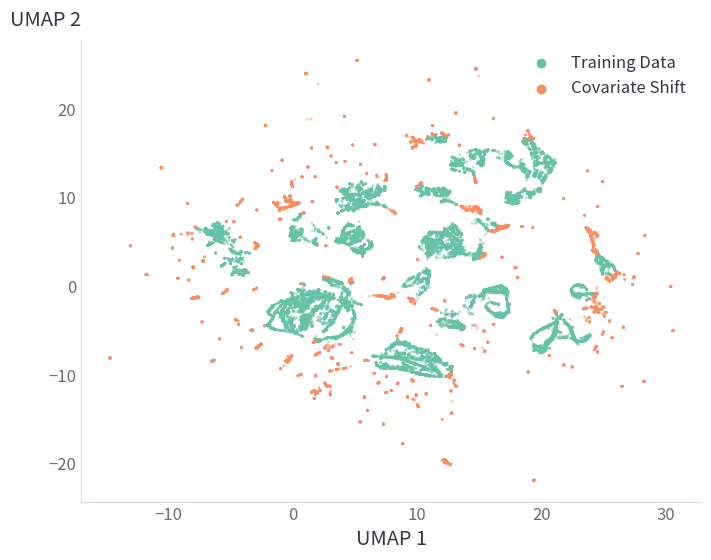

In [70]:
data['Dataset'] = ['Covariate Shift' if x else 'Training Data' for x in data['Xshift_umap']]
test_sets = data.select_dtypes(bool)
data['num_test_sets'] = data[test_sets].sum(axis=1)
data['training'] = data['num_test_sets'] == 0
ax = sns.scatterplot(data.query('training or Xshift_umap'), x='umap_x', y='umap_y', hue='Dataset', ec=None, s=3,
                     legend=False, alpha=0.5, palette='Set2', hue_order=['Training Data', 'Covariate Shift'])

c1, c2 = sns.color_palette('Set2', 2)
plt.scatter([], [], color=c1, label='Training Data')
plt.scatter([], [], color=c2, label='Covariate Shift')
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/umap_dist.png')

/tmp/ipykernel_478189/1700105556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')


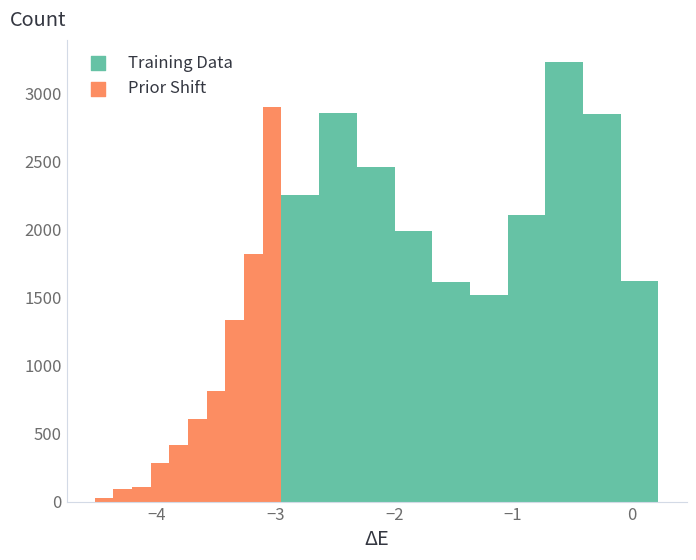

In [71]:
ydata = data.query('training or infoY_delta_e')
ydata['Dataset'] = np.where(ydata['infoY_delta_e'], 'Prior Shift', 'Training')

bins = np.hstack([
    np.histogram_bin_edges(ydata.query('infoY_delta_e')['delta_e']),
    np.histogram_bin_edges(ydata.query('training')['delta_e'])
])
alpha = 1
sns.histplot(ydata, x='delta_e', hue='Dataset', bins=bins, palette='Set2', alpha=alpha, ec='black')
plt.scatter([], [], color=c1, label='Training Data', marker='s', s=100, alpha=alpha)
plt.scatter([], [], color=c2, label='Prior Shift', marker='s', s=100, alpha=alpha)
plt.legend()
plt.xlabel('ΔE')
rp.ylabel_top()
plt.savefig('figs/prior_dist.png')

In [72]:
from umap import UMAP
from umap.umap_ import nearest_neighbors

# sup_data = data.query('dataset_split >= 0')
# umap_Xy = sup_data.select_dtypes('number').drop(columns=['TSNE_x', 'TSNE_y', 'bandgap', 'magmom_pa', 'dataset_split'])
# umap_X = umap_Xy.drop(columns=['delta_e'])
# umap_y = umap_Xy['delta_e']

# knn = nearest_neighbors(
#     umap_X,
#     n_neighbors=250,
#     metric="manhattan",
#     metric_kwds=None,
#     angular=False,
#     random_state=2718,
# )

# umap = UMAP(n_neighbors=200, precomputed_knn=knn, min_dist=0.7)

# sup_data[['sup_umap_x', 'sup_umap_y']] = umap.fit_transform(umap_X, y=umap_y)

sup_data = pd.read_feather('umap_data.feather')

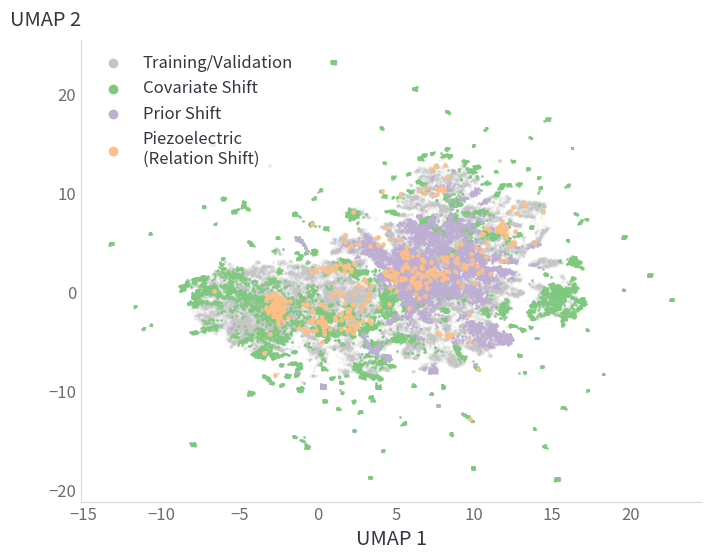

In [73]:
splits = {
    'Training/Validation': sup_data.query('training or Rsplt1 or Rsplt2 or Rsplt3 or Rsplt4 or Rsplt5'),
    'Covariate Shift': sup_data.query('Xshift_umap'),
    'Prior Shift': sup_data.query('infoY_delta_e'),
    'Piezoelectric\n(Relation Shift)': sup_data.query('piezo'),
}

split_kwargs = {
    'Training/Validation': {'alpha': 0.1},
    'Piezoelectric\n(Relation Shift)': {'s': 6, 'alpha': 0.9},
}

colors = ['#c5c5c5', *sns.color_palette('Accent', n_colors=len(splits))]

for (name, split), color in zip(splits.items(), colors):
    kwargs = {'s': 1, 'color': color, 'alpha': 0.8}
    kwargs.update(split_kwargs.get(name, {}))
    plt.scatter(split['sup_umap_x'], split['sup_umap_y'], **kwargs)
    plt.scatter([], [], color=color, label=name)

plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
rp.ylabel_top()
plt.savefig('figs/global_umap.png')

In [74]:
df = pd.read_csv('ablation.csv')
df = df.melt(id_vars=['type', 'epoch'], var_name='dataset', value_name='loss')

df['sal'] = df['type'].str.contains('Y info') | df['type'].str.contains('SAL')
df['type'] = df['type'].str.removeprefix('SAL ')
df['last'] = df['epoch'] == 'last'
df['ema'] = df['epoch'] == 'EMA'
fig_sets = {
    'train': 'Training',
    'piezo': "Piezoelectric\n(Relation Shift)",
    # 'Xshift_tsne': "X shift (TSNE)",
    'Xshift_umap': "Covariate Shift",
    # 'statY_delta_e': "Extreme ΔE\n(Prior Shift)",
    'infoY_delta_e': "Low ΔE\n(Prior Shift)",
    'statY_bandgap': "High-Bandgap\nMaterials",
    'rsplt_ave': 'Validation'
}
df['fig'] = df['dataset'].isin(fig_sets)
df['dataset'] = [fig_sets.get(x, x) for x in df['dataset']]
df['dataset_size'] = df['type'].str.extract(r'(\d+)x(\d+)').applymap(float).prod(axis=1)
df['type'] = df['type'].str.rstrip('1234567890x').str.removesuffix(' ')
df

/tmp/ipykernel_478189/1477999188.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['dataset_size'] = df['type'].str.extract(r'(\d+)x(\d+)').applymap(float).prod(axis=1)


type           epoch     dataset      loss    sal   last    ema   fig  \
0     Y info             354    Training  0.101000   True  False  False  True   
1     Y info             355    Training  0.108000   True  False  False  True   
2     Y info             356    Training  0.087000   True  False  False  True   
3     Y info            last    Training  0.089400   True   True  False  True   
4     Y info             EMA    Training  0.038300   True  False   True  True   
...      ...             ...         ...       ...    ...    ...    ...   ...   
1375   Xumap             EMA  Validation  0.086285   True  False   True  True   
1376   Xumap             EMA  Validation  0.077532  False  False   True  True   
1377   Xumap      best_valid  Validation  0.074064  False  False  False  True   
1378   Xumap  IR3_best_train  Validation  0.080111  False  False  False  True   
1379   Xumap            last  Validation  0.080111  False   True  False  True   

      dataset_size  
0            256.0  
1            256.0  
2            256.0  
3            256.0  
4            256.0  
...            ...  
1375           1.0  
1376           1.0  
1377           1.0  
1378           1.0  
1379           1.0  

[1380 rows x 9 columns]

['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


/tmp/ipykernel_478189/1831943224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['theta'] = [col_x[c] for c in subs['dataset']]


type epoch                          dataset    loss    sal   last  \
766   baseline   EMA                  Covariate Shift  0.0841  False  False   
1042  baseline   EMA          High-Bandgap\nMaterials  0.1400  False  False   
950   baseline   EMA            Low ΔE\n(Prior Shift)  0.1602  False  False   
1226  baseline   EMA  Piezoelectric\n(Relation Shift)  0.0840  False  False   
30    baseline   EMA                         Training  0.0012  False  False   
1318  baseline   EMA                       Validation  0.0830  False  False   
766   baseline   EMA                  Covariate Shift  0.0841  False  False   

       ema   fig  dataset_size     theta  
766   True  True           1.0  0.000000  
1042  True  True           1.0  1.047198  
950   True  True           1.0  2.094395  
1226  True  True           1.0  3.141593  
30    True  True           1.0  4.188790  
1318  True  True           1.0  5.235988  
766   True  True           1.0  6.283185

type epoch                          dataset    loss   sal   last  \
820   baseline   EMA                  Covariate Shift  0.0860  True  False   
1096  baseline   EMA          High-Bandgap\nMaterials  0.1317  True  False   
1004  baseline   EMA            Low ΔE\n(Prior Shift)  0.1422  True  False   
1280  baseline   EMA  Piezoelectric\n(Relation Shift)  0.0749  True  False   
84    baseline   EMA                         Training  0.0073  True  False   
1372  baseline   EMA                       Validation  0.0835  True  False   
820   baseline   EMA                  Covariate Shift  0.0860  True  False   

       ema   fig  dataset_size     theta  
820   True  True           1.0  0.000000  
1096  True  True           1.0  1.047198  
1004  True  True           1.0  2.094395  
1280  True  True           1.0  3.141593  
84    True  True           1.0  4.188790  
1372  True  True           1.0  5.235988  
820   True  True           1.0  6.283185

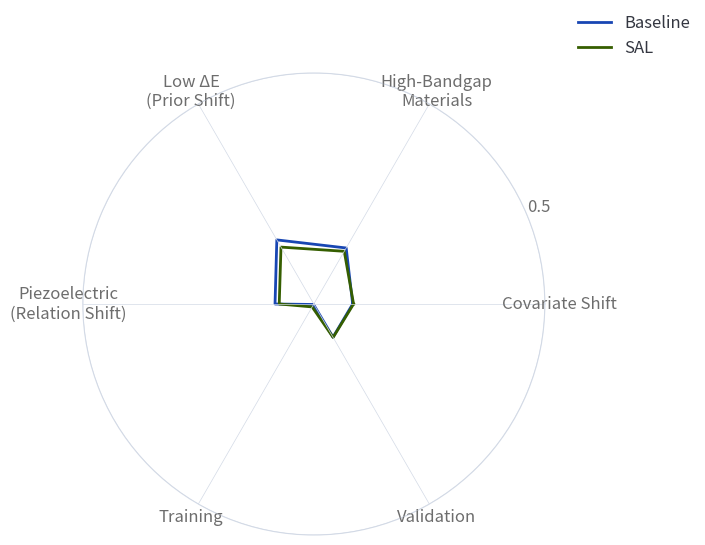

In [75]:
def radial_plot(subs):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    cols = sorted(pd.unique(subs['dataset']))
    print(cols)
    n_cols = len(cols)
    col_x = {ds: i * 2 * np.pi / n_cols for i, ds in enumerate(cols)}
    subs['theta'] = [col_x[c] for c in subs['dataset']]

    for sal_val, color, label in zip((False, True), cs, ('Baseline', 'SAL')):
        group = subs.query('sal == @sal_val').sort_values('theta')
        last_row = group.iloc[[0]].copy()
        last_row['theta'] += 2 * np.pi
        group = pd.concat([group, last_row], axis=0)
        display(group)
        ax.plot(group['theta'], group['loss'], label=label, color=color, zorder=2, lw=2)

    fig.legend()
    ticks = list(col_x.values())
    ticklabels = list(col_x.keys())
    ax.set_xticks(ticks=ticks, labels=ticklabels)
    ax.set_thetamax(360)
    return fig, ax

subs = df.query('type == "baseline" and ema and fig')
fig, ax = radial_plot(subs)
ax.set_rticks([0.5])
ax.grid(lw=0.5)
fig.savefig('figs/radial_baseline.png')

/tmp/ipykernel_478189/3640890726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')


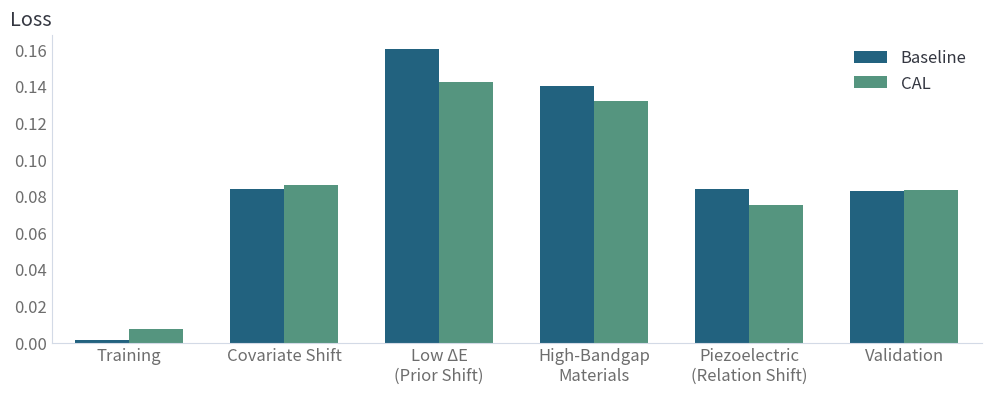

In [76]:
def normal_plot(subs):
    fig, ax = plt.subplots(figsize=(12, 4))
    subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')
    sns.barplot(subs, hue='CAL', x='dataset', y='loss', ax=ax, hue_order=['Baseline', 'CAL'], width=0.7,
                palette='rho_viridia')
    ax.set_xlabel('')
    ax.get_legend().set_title('')
    ax.get_legend().set_frame_on(False)
    ax.set_ylabel('Loss')
    rp.ylabel_top(ax)
    return fig, ax

fig, ax = normal_plot(subs)
fig.savefig('figs/normal_baseline.png')

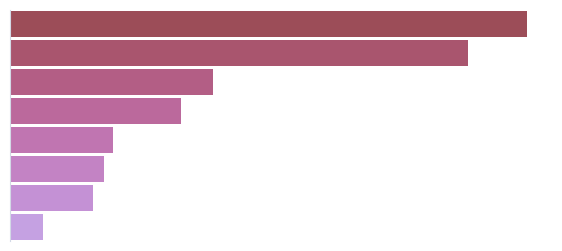

In [77]:
rng = np.random.default_rng(124)

xs = np.sort(rng.gamma(2, 1, size=8))[::-1]

pal = sns.cubehelix_palette(n_colors=len(xs), start=1.7, rot=-0.7, gamma=1, hue=1, light=0.7, dark=0.4)

fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(x=xs, y=np.arange(len(xs)), palette=pal, orient='h', width=0.9, hue=xs, legend=False, saturation=1)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
sns.despine(bottom=True)

plt.savefig('figs/err_fig.png')

In [78]:
df['CAL'] = np.where(df['sal'], 'CAL', 'Baseline')

dataset_target = df['type'].copy()
dataset_target.iloc[:] = ""
dataset_target.loc[(df['type'] == 'finetune') & (df['dataset_size'] == 1024)] = 'Low ΔE\n(Prior Shift)'
dataset_target.loc[(df['type'] == 'Y info') & (df['dataset_size'] == 1024)] = 'Low ΔE\n(Prior Shift)'
dataset_target.loc[(df['type'] == "Piezo2") & (df['dataset_size'] == 256)] = 'Piezoelectric\n(Relation Shift)'
dataset_target.loc[(df['type'] == "Finetune Piezo") & (df['dataset_size'] == 256)] = 'Piezoelectric\n(Relation Shift)'
dataset_target.loc[df['type'] == "Xumap"] = 'Covariate Shift'


df['target'] = dataset_target

targeted = df[df['target'] == df['dataset']].query('ema')
targeted

type epoch                          dataset      loss    sal  \
823            Xumap   EMA                  Covariate Shift  0.075501   True   
824            Xumap   EMA                  Covariate Shift  0.073838  False   
934           Y info   EMA            Low ΔE\n(Prior Shift)  0.019200   True   
958         finetune   EMA            Low ΔE\n(Prior Shift)  0.015400  False   
1251  Finetune Piezo   EMA  Piezoelectric\n(Relation Shift)  0.117600  False   
1273          Piezo2   EMA  Piezoelectric\n(Relation Shift)  0.036500   True   

       last   ema   fig  dataset_size       CAL  \
823   False  True  True           1.0       CAL   
824   False  True  True           1.0  Baseline   
934   False  True  True        1024.0       CAL   
958   False  True  True        1024.0  Baseline   
1251  False  True  True         256.0  Baseline   
1273  False  True  True         256.0       CAL   

                               target  
823                   Covariate Shift  
824                   Covariate Shift  
934             Low ΔE\n(Prior Shift)  
958             Low ΔE\n(Prior Shift)  
1251  Piezoelectric\n(Relation Shift)  
1273  Piezoelectric\n(Relation Shift)

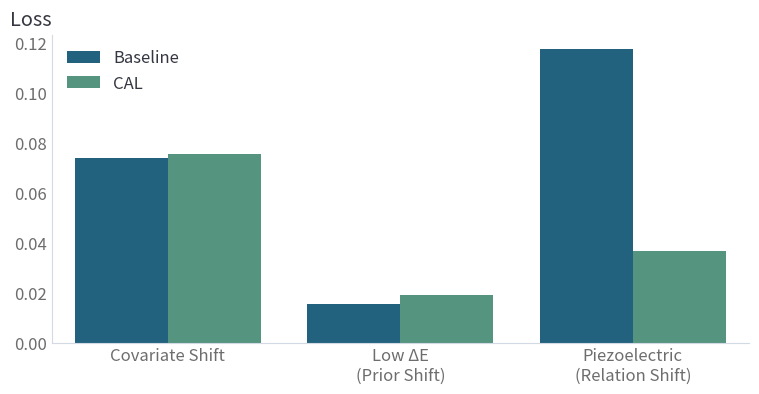

In [79]:
fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.barplot(targeted, x='dataset', y='loss', hue='CAL',
                 hue_order=('Baseline', 'CAL'), palette='rho_viridia')

ax.get_legend().set_title('')
ax.set_xlabel('')
ax.set_ylabel('Loss')
rp.ylabel_top()

fig.savefig('figs/targeted.png')

In [80]:
df['post'] = df['type'].isin(('Y info', 'finetune'))
post = df.query('post')
post

type                      epoch     dataset    loss    sal   last  \
0       Y info                        354    Training  0.1010   True  False   
1       Y info                        355    Training  0.1080   True  False   
2       Y info                        356    Training  0.0870   True  False   
3       Y info                       last    Training  0.0894   True   True   
4       Y info                        EMA    Training  0.0383   True  False   
...        ...                        ...         ...     ...    ...    ...   
1327  finetune       best_vaild_0.0055_66  Validation  0.0776  False  False   
1328  finetune  IR3_best_train_0.0003_100  Validation  0.0764  False  False   
1329  finetune                       last  Validation  0.0759  False   True   
1330  finetune       best_vaild_0.0055_77  Validation  0.0774  False  False   
1331  finetune  IR3_best_train_0.0003_119  Validation  0.0761  False  False   

        ema   fig  dataset_size       CAL                 target  post  
0     False  True         256.0       CAL                         True  
1     False  True         256.0       CAL                         True  
2     False  True         256.0       CAL                         True  
3     False  True         256.0       CAL                         True  
4      True  True         256.0       CAL                         True  
...     ...   ...           ...       ...                    ...   ...  
1327  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1328  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1329  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1330  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1331  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  

[600 rows x 12 columns]

In [81]:
# sns.lineplot(post.query('fig and ema and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')
# sns.lineplot(post.query('fig and last and dataset == "Low ΔE"'), hue='sal', x='dataset_size', y='loss')

type epoch                          dataset    loss    sal  last  \
13      Y info  last                         Training  0.0774   True  True   
41    finetune  last                         Training  0.0006  False  True   
749     Y info  last                  Covariate Shift  0.1827   True  True   
777   finetune  last                  Covariate Shift  0.0917  False  True   
933     Y info  last            Low ΔE\n(Prior Shift)  0.0268   True  True   
961   finetune  last            Low ΔE\n(Prior Shift)  0.0059  False  True   
1025    Y info  last          High-Bandgap\nMaterials  0.0422   True  True   
1053  finetune  last          High-Bandgap\nMaterials  0.0234  False  True   
1209    Y info  last  Piezoelectric\n(Relation Shift)  0.1186   True  True   
1237  finetune  last  Piezoelectric\n(Relation Shift)  0.0878  False  True   
1301    Y info  last                       Validation  0.1436   True  True   
1329  finetune  last                       Validation  0.0759  False  True   

        ema   fig  dataset_size       CAL                 target  post  
13    False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
41    False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
749   False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
777   False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
933   False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
961   False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1025  False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
1053  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1209  False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
1237  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True  
1301  False  True        1024.0       CAL  Low ΔE\n(Prior Shift)  True  
1329  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True

['Covariate Shift', 'High-Bandgap\nMaterials', 'Low ΔE\n(Prior Shift)', 'Piezoelectric\n(Relation Shift)', 'Training', 'Validation']


type epoch                          dataset    loss    sal  last  \
777   finetune  last                  Covariate Shift  0.0917  False  True   
1053  finetune  last          High-Bandgap\nMaterials  0.0234  False  True   
961   finetune  last            Low ΔE\n(Prior Shift)  0.0059  False  True   
1237  finetune  last  Piezoelectric\n(Relation Shift)  0.0878  False  True   
41    finetune  last                         Training  0.0006  False  True   
1329  finetune  last                       Validation  0.0759  False  True   
777   finetune  last                  Covariate Shift  0.0917  False  True   

        ema   fig  dataset_size       CAL                 target  post  \
777   False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
1053  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
961   False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
1237  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
41    False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
1329  False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   
777   False  True        1024.0  Baseline  Low ΔE\n(Prior Shift)  True   

         theta  
777   0.000000  
1053  1.047198  
961   2.094395  
1237  3.141593  
41    4.188790  
1329  5.235988  
777   6.283185

type epoch                          dataset    loss   sal  last  \
749   Y info  last                  Covariate Shift  0.1827  True  True   
1025  Y info  last          High-Bandgap\nMaterials  0.0422  True  True   
933   Y info  last            Low ΔE\n(Prior Shift)  0.0268  True  True   
1209  Y info  last  Piezoelectric\n(Relation Shift)  0.1186  True  True   
13    Y info  last                         Training  0.0774  True  True   
1301  Y info  last                       Validation  0.1436  True  True   
749   Y info  last                  Covariate Shift  0.1827  True  True   

        ema   fig  dataset_size  CAL                 target  post     theta  
749   False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  0.000000  
1025  False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  1.047198  
933   False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  2.094395  
1209  False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  3.141593  
13    False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  4.188790  
1301  False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  5.235988  
749   False  True        1024.0  CAL  Low ΔE\n(Prior Shift)  True  6.283185

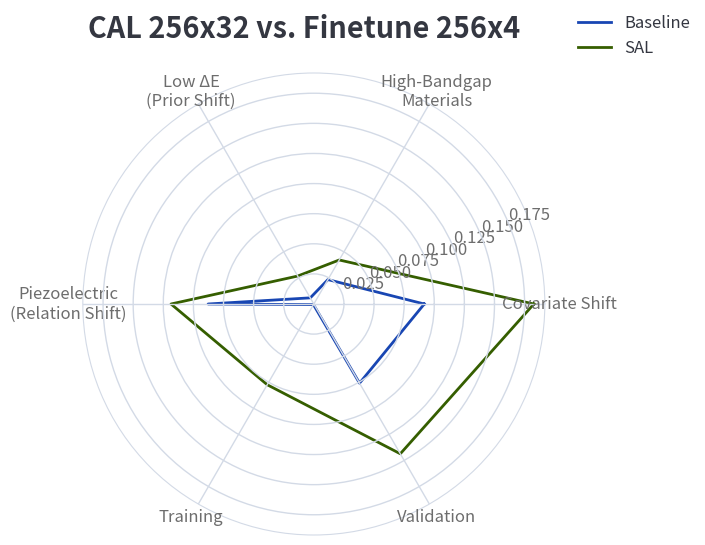

In [82]:
last_best = post.query('fig and last')
last_best = last_best.query('(type == "finetune" and dataset_size == 1024) or (type == "Y info" and dataset_size == 1024)')
display(last_best)
fig, ax = radial_plot(last_best)
fig.suptitle('CAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/radial_infoy_last.png')

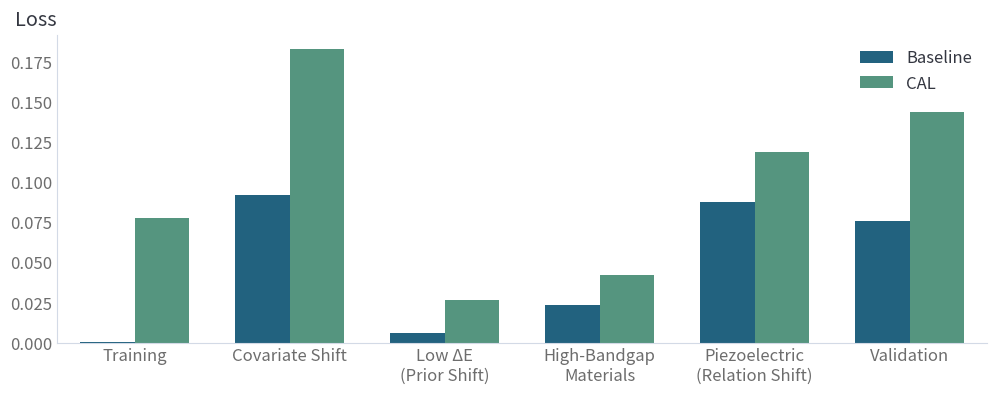

In [83]:
fig, ax = normal_plot(last_best)
# fig.suptitle('SAL 256x32 vs. Finetune 256x4')
fig.savefig('figs/normal_infoy_last.png')

In [84]:
pd.read_feather('exps/delta_e_piezo_2/SAL-training_loss.feather')

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
0        1  0.034715       0.164271  0.102765  0.102031  0.106452  0.108030   
1        2  0.028391       0.050317  0.097718  0.097023  0.101424  0.103113   
2        3  0.026510       0.038649  0.095945  0.095165  0.099448  0.101209   
3        4  0.025408       0.034084  0.094484  0.093560  0.097961  0.099736   
4        5  0.058007       0.194969  0.140352  0.137347  0.145336  0.145452   
..     ...       ...            ...       ...       ...       ...       ...   
214    215  0.031007       0.052083  0.109190  0.106569  0.112818  0.114197   
215    216  0.039033       0.048609  0.113077  0.111300  0.117011  0.117136   
216    217  0.025309       0.143991  0.105122  0.103003  0.108424  0.110145   
217    218  0.045642       0.063121  0.130908  0.128928  0.133781  0.137211   
218    219  0.018553            NaN  0.096266  0.094961  0.099961  0.101210   

       Rsplt5  Xshift_tsne  Xshift_umap  statY_delta_e  infoY_delta_e  \
0    0.106872     0.092764     0.123653       0.691778       0.140333   
1    0.101577     0.088762     0.118496       0.687930       0.135183   
2    0.099720     0.086470     0.115253       0.684378       0.135769   
3    0.098228     0.083687     0.112614       0.681039       0.129008   
4    0.144588     0.166109     0.167949       0.685957       0.264363   
..        ...          ...          ...            ...            ...   
214  0.114178     0.115088     0.136282       0.675602       0.219320   
215  0.118751     0.122645     0.141093       0.637092       0.235291   
216  0.109189     0.099944     0.123529       0.702161       0.184028   
217  0.135112     0.121632     0.170137       0.791748       0.154929   
218  0.100306     0.090474     0.114280       0.704337       0.167985   

     statY_bandgap  infoY_bandgap     piezo  rsplt_ave  Partial  
0         0.156589       0.113302  0.076228   0.105230      NaN  
1         0.146572       0.104617  0.069712   0.100171      NaN  
2         0.147040       0.104634  0.066970   0.098297      NaN  
3         0.138776       0.098714  0.063788   0.096794      NaN  
4         0.447714       0.317613  0.039905   0.142615      NaN  
..             ...            ...       ...        ...      ...  
214       0.305395       0.216091  0.036289   0.111390      NaN  
215       0.325209       0.232565  0.037022   0.115455      NaN  
216       0.213299       0.157823  0.033452   0.107177      NaN  
217       0.150374       0.118313  0.033975   0.133188      NaN  
218       0.168817       0.124121  0.036542   0.098541      NaN  

[219 rows x 17 columns]

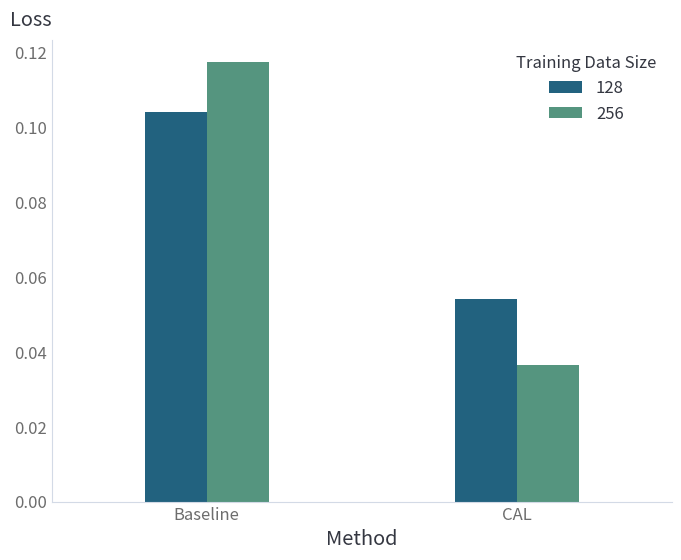

In [85]:
fig, ax = plt.subplots()
piezo = df[df['type'].str.contains('Piezo')]
piezo_fig = piezo[piezo['dataset'] == "Piezoelectric\n(Relation Shift)"].query('dataset_size > 1 and ema')
piezo_fig['Training Data Size'] = piezo_fig['dataset_size'].map(lambda x: f'{x:.0f}')
sns.barplot(piezo_fig, hue='Training Data Size', x='sal', y='loss', legend=True, ax=ax, width=0.4, palette='rho_viridia')
# ax.set_xticks(ax.get_xticks(), labels=['128', '256'])
ax.set_xticks(ax.get_xticks(), labels=['Baseline', 'CAL'])
# ax.set_title('Piezoelectric Fine-tuning Performance')
ax.set_xlabel('Method')
ax.set_ylabel('Loss')
rp.ylabel_top()
fig.legend
fig.savefig('figs/piezo.png')

In [87]:
pdf = pd.read_feather('exps/delta_e_piezo_2/SAL-training_loss.feather')
pdf

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
0        1  0.034715       0.164271  0.102765  0.102031  0.106452  0.108030   
1        2  0.028391       0.050317  0.097718  0.097023  0.101424  0.103113   
2        3  0.026510       0.038649  0.095945  0.095165  0.099448  0.101209   
3        4  0.025408       0.034084  0.094484  0.093560  0.097961  0.099736   
4        5  0.058007       0.194969  0.140352  0.137347  0.145336  0.145452   
..     ...       ...            ...       ...       ...       ...       ...   
214    215  0.031007       0.052083  0.109190  0.106569  0.112818  0.114197   
215    216  0.039033       0.048609  0.113077  0.111300  0.117011  0.117136   
216    217  0.025309       0.143991  0.105122  0.103003  0.108424  0.110145   
217    218  0.045642       0.063121  0.130908  0.128928  0.133781  0.137211   
218    219  0.018553            NaN  0.096266  0.094961  0.099961  0.101210   

       Rsplt5  Xshift_tsne  Xshift_umap  statY_delta_e  infoY_delta_e  \
0    0.106872     0.092764     0.123653       0.691778       0.140333   
1    0.101577     0.088762     0.118496       0.687930       0.135183   
2    0.099720     0.086470     0.115253       0.684378       0.135769   
3    0.098228     0.083687     0.112614       0.681039       0.129008   
4    0.144588     0.166109     0.167949       0.685957       0.264363   
..        ...          ...          ...            ...            ...   
214  0.114178     0.115088     0.136282       0.675602       0.219320   
215  0.118751     0.122645     0.141093       0.637092       0.235291   
216  0.109189     0.099944     0.123529       0.702161       0.184028   
217  0.135112     0.121632     0.170137       0.791748       0.154929   
218  0.100306     0.090474     0.114280       0.704337       0.167985   

     statY_bandgap  infoY_bandgap     piezo  rsplt_ave  Partial  
0         0.156589       0.113302  0.076228   0.105230      NaN  
1         0.146572       0.104617  0.069712   0.100171      NaN  
2         0.147040       0.104634  0.066970   0.098297      NaN  
3         0.138776       0.098714  0.063788   0.096794      NaN  
4         0.447714       0.317613  0.039905   0.142615      NaN  
..             ...            ...       ...        ...      ...  
214       0.305395       0.216091  0.036289   0.111390      NaN  
215       0.325209       0.232565  0.037022   0.115455      NaN  
216       0.213299       0.157823  0.033452   0.107177      NaN  
217       0.150374       0.118313  0.033975   0.133188      NaN  
218       0.168817       0.124121  0.036542   0.098541      NaN  

[219 rows x 17 columns]

In [88]:
piezo_tab = df[df['type'].str.contains('iezo') | df['type'].str.contains('ase')].query('ema')
piezo_tab.pivot_table(index='dataset', columns=['type', 'dataset_size'], values='loss').round(4)

type                            Finetune Piezo           Piezo  Piezo2  \
dataset_size                             128.0   256.0   1.0     128.0   
dataset                                                                  
Covariate Shift                         0.0893  0.0900  0.1185  0.1111   
High-Bandgap\nMaterials                 0.0611  0.0507  0.2152  0.2280   
Low ΔE\n(Prior Shift)                   0.0565  0.0442  0.1881  0.2124   
Piezoelectric\n(Relation Shift)         0.1042  0.1176  0.0573  0.0542   
Rsplt1                                  0.0810  0.0811  0.0999  0.0999   
Rsplt2                                  0.0802  0.0804  0.0991  0.0986   
Rsplt3                                  0.0853  0.0855  0.1035  0.1037   
Rsplt4                                  0.0863  0.0865  0.1044  0.1043   
Rsplt5                                  0.0838  0.0839  0.1041  0.1043   
Training                                0.0725  0.0815  0.0249  0.0236   
Validation                              0.0833     NaN  0.1022  0.1021   
Xshift_tsne                             0.0628  0.0627  0.0939  0.0915   
infoY_bandgap                           0.0467  0.0396  0.1496  0.1634   
statY_delta_e                           0.5921  0.5797  0.6976  0.6858   

type                                    baseline  
dataset_size                      256.0    1.0    
dataset                                           
Covariate Shift                  0.1143   0.0850  
High-Bandgap\nMaterials          0.1688   0.1359  
Low ΔE\n(Prior Shift)            0.1680   0.1512  
Piezoelectric\n(Relation Shift)  0.0365   0.0794  
Rsplt1                           0.0963   0.0810  
Rsplt2                           0.0950   0.0802  
Rsplt3                           0.1000   0.0852  
Rsplt4                           0.1012   0.0857  
Rsplt5                           0.1003   0.0843  
Training                         0.0186   0.0042  
Validation                       0.0985   0.0832  
Xshift_tsne                      0.0905   0.0602  
infoY_bandgap                    0.1241   0.1001  
statY_delta_e                    0.7043   0.6729

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


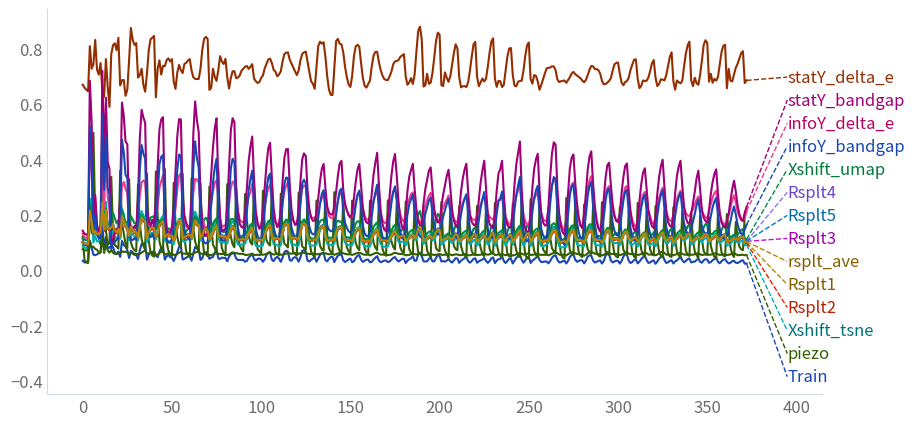

In [89]:
pdf = pd.read_feather('exps/delta_e_piezo_3_long/SAL-training_loss.feather')
pdf.sort_values('epoch')

fig, ax = plt.subplots(figsize=(10, 5))
pdf.drop(columns=['epoch']).plot(ax=ax)
rp.line_labels()

dataset    Rsplt1    Rsplt2    Rsplt3    Rsplt4    Rsplt5  Xshift_tsne  \
output  -1.412722 -1.418012 -1.409161 -1.388913 -1.399050    -1.575561   
target  -1.480051 -1.485498 -1.470971 -1.445060 -1.466887    -1.691499   
loss     0.099852  0.098586  0.103670  0.104276  0.104255     0.091496   

dataset  Xshift_umap  infoY_bandgap  infoY_delta_e     piezo  statY_bandgap  \
output     -1.090978      -2.056470      -2.716198 -1.633095      -2.029848   
target     -1.120132      -2.518289      -3.298072 -1.726399      -2.602811   
loss        0.111088       0.163360       0.212435  0.054227       0.227955   

dataset  statY_delta_e  
output       -1.500480  
target       -1.127669  
loss          0.685746

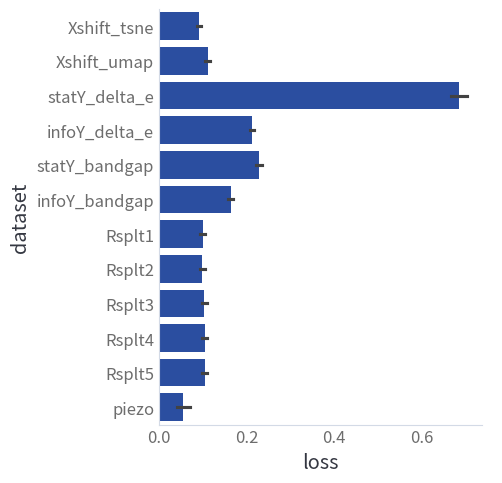

In [90]:
resdf = pd.read_feather('exps/delta_e_piezo_3_long/results_ema.feather')
display(resdf.groupby('dataset').mean().T)
sns.catplot(resdf, y='dataset', x='loss', kind='bar')

dataset    Rsplt1    Rsplt2    Rsplt3    Rsplt4    Rsplt5  Xshift_tsne  \
output  -1.425150 -1.429386 -1.421442 -1.401112 -1.411394    -1.597395   
target  -1.480051 -1.485498 -1.470971 -1.445060 -1.466887    -1.691499   
loss     0.097760  0.096720  0.101364  0.102384  0.102030     0.088498   

dataset  Xshift_umap  infoY_bandgap  infoY_delta_e     piezo  statY_bandgap  \
output     -1.115205      -2.062335      -2.724597 -1.640258      -2.038497   
target     -1.120132      -2.518289      -3.298072 -1.726399      -2.602811   
loss        0.108591       0.161201       0.210865  0.054653       0.224037   

dataset  statY_delta_e  
output       -1.500387  
target       -1.127669  
loss          0.688352

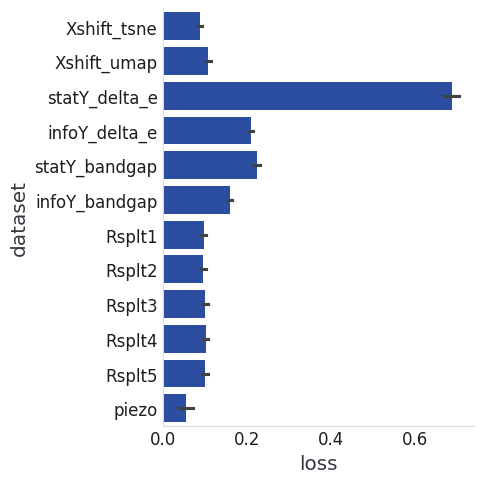

In [ ]:
resdf = pd.read_feather('exps/delta_e_piezo_3_weighted/results_ema.feather')
display(resdf.groupby('dataset').mean().T)
sns.catplot(resdf, y='dataset', x='loss', kind='bar')

In [ ]:
resdf.query('dataset == "piezo"').shape

(126, 4)

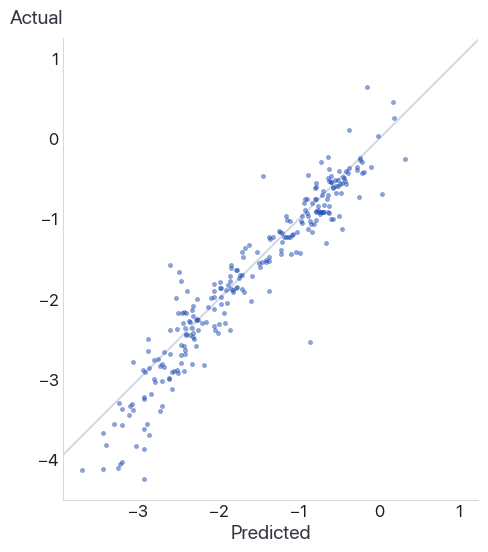

In [ ]:
plt.gca().set_aspect('equal', adjustable='box')
plt.axline((0, 0), (1, 1), c=plt.rcParams['axes.edgecolor'], zorder=-99)
sns.scatterplot(resdf.query('dataset == "piezo"'), x='output', y='target', ec=None, s=10, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Predicted Formation Energy (Piezo)')
rp.ylabel_top()
plt.savefig('figs/piezo_scatter.png')

/tmp/ipykernel_478189/3640890726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['CAL'] = np.where(subs['sal'], 'CAL', 'Baseline')


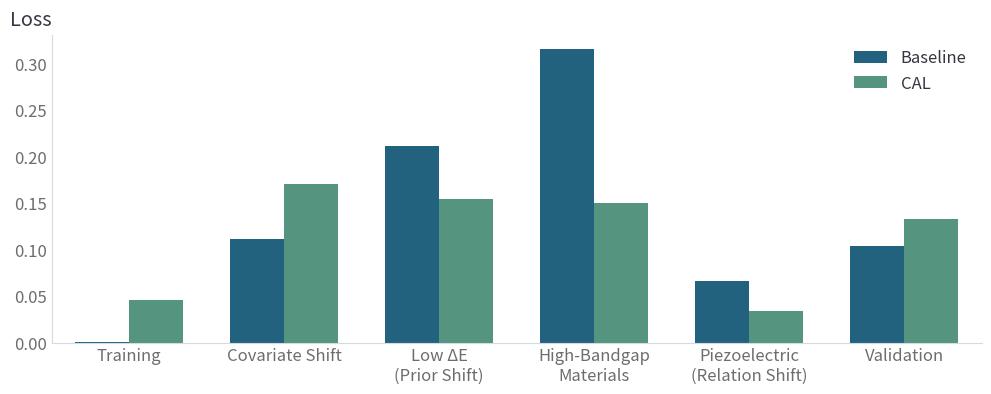

In [91]:
fig, ax = normal_plot(piezo.query('fig and last and ((not sal and dataset_size == 128) or (sal and dataset_size == 256))'))
# ax.set_title('Piezoelectric Fine-Tuning')
fig.savefig('figs/normal_piezo.png')

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


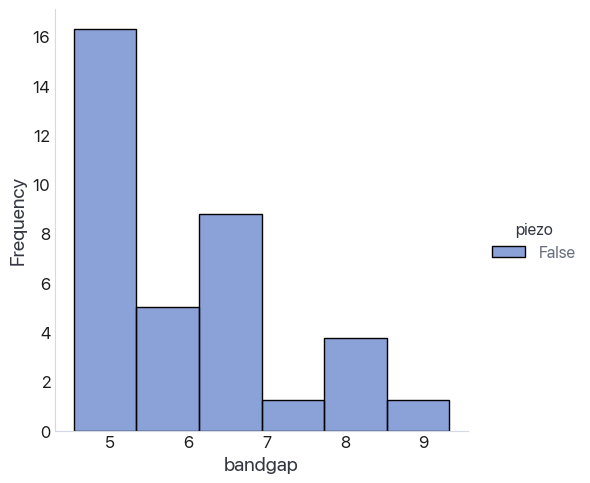

In [ ]:
sns.displot(data.query('dataset_split == 7 and statY_bandgap'), x='bandgap', hue='piezo', stat='frequency')

In [ ]:
from pathlib import Path

results = {}
for feather in Path('exps/results').glob('*.feather'):
    results[feather.name] = pd.read_feather(feather)

{k: len(v.index) for k, v in results.items()}

{'delta_e_03-04-14-14.feather': 126,
 'delta_e_Yinfo_256x2.feather': 143,
 'delta_e_piezo_128_early_stop.feather': 61,
 'delta_e_statY.feather': 454,
 'delta_e_Yinfo_256x16.feather': 328,
 'delta_e_Xumap.feather': 381,
 'delta_e_Xtsne.feather': 175,
 'delta_e_baseline.feather': 103,
 'delta_e_Yinfo_256x1.feather': 358,
 'delta_e_Yinfo_256x8_no_space.feather': 245,
 'delta_e_Xumap_256x4.feather': 501,
 'delta_e_piezo_128.feather': 223,
 'delta_e_Yinfo_256x4.feather': 133,
 'delta_e_Yinfo_256x32.feather': 138,
 'delta_e_Yinfo_256x8.feather': 420,
 'delta_e_Xtsne_256x4.feather': 265}

In [ ]:
!ls exps/

delta_e_02-04-15-04/             delta_e_02-26-21-19/
delta_e_02-04-long/              delta_e_02-26-21-31/
delta_e_02-05-13-23/             delta_e_02-26-21-43/
delta_e_02-05-13-25/             delta_e_02-26-22-21/
delta_e_02-05-better-hopefully/  delta_e_02-26-23-03/
delta_e_02-12-13-31/             delta_e_02-27-10-31/
delta_e_02-12-13-42/             delta_e_02-27-11-29/
delta_e_02-12-13-45/             delta_e_02-27-12-11/
delta_e_02-12-13-46/             delta_e_02-27-16-46/
delta_e_02-12-13-50/             delta_e_02-27-18-16/
delta_e_02-12-13-51/             delta_e_04-22-10-51/
delta_e_02-19-13-22/             delta_e_04-22-11-28/
delta_e_02-19-13-30/             delta_e_04-22-11-29/
delta_e_02-19-13-31/             delta_e_04-22-11-30/
delta_e_02-19-13-33/             delta_e_04-22-11-31/
delta_e_02-19-13-35/             delta_e_04-22-11-32/
delta_e_02-19-13-42/             delta_e_04-22-11-44/
delta_e_02-19-13-46/             delta_e_04-22-12-41/
delta_e_02-19-13-47/        

/home/nicholas/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
9       10  0.019338       0.028355  0.089003  0.088098  0.092461  0.093719   
8        9  0.019559       0.029924  0.089048  0.088229  0.092531  0.093775   
6        7  0.020893       0.030370  0.088808  0.087993  0.092328  0.093600   
5        6  0.021386       0.031966  0.090729  0.089819  0.094269  0.095504   
7        8  0.020615       0.032179  0.089756  0.088755  0.093153  0.094428   
3        4  0.023509       0.032999  0.092877  0.091906  0.096152  0.097707   
4        5  0.022401       0.033463  0.091077  0.090279  0.094651  0.095972   
2        3  0.024914       0.036673  0.095132  0.094308  0.098405  0.100017   
63      64  0.083351       0.045463  0.148067  0.147690  0.152733  0.155860   
1        2  0.026953       0.049022  0.097327  0.096447  0.100698  0.102158   
320    321  0.055496       0.057224  0.118506  0.117687  0.122044  0.125462   
351    352  0.063020       0.059711  0.123454  0.122815  0.126781  0.130551   
336    337  0.074955       0.061501  0.121876  0.118359  0.124716  0.125721   
80      81  0.057378       0.061881  0.119764  0.119540  0.123937  0.127087   
234    235  0.075049       0.062225  0.118100  0.115230  0.120809  0.121657   
75      76  0.109529       0.064896  0.173046  0.172015  0.177596  0.181356   
327    328  0.068668       0.065213  0.133314  0.132473  0.136879  0.140724   
297    298  0.057829       0.065780  0.123118  0.121909  0.128066  0.130710   
264    265  0.061588       0.067171  0.113870  0.111452  0.116206  0.118891   
296    297  0.051052       0.067284  0.115440  0.114667  0.120169  0.122342   
321    322  0.073412       0.067572  0.137020  0.136318  0.141553  0.144791   
333    334  0.067544       0.068721  0.134625  0.133680  0.138191  0.142262   
335    336  0.049032       0.068831  0.100024  0.097691  0.103353  0.105028   
150    151  0.112968       0.069736  0.140446  0.138142  0.142820  0.144403   
276    277  0.055476       0.069869  0.107507  0.104397  0.109179  0.111769   
74      75  0.092966       0.070712  0.162534  0.161638  0.166566  0.170636   
348    349  0.085326       0.070757  0.123459  0.120029  0.125971  0.127007   
72      73  0.075369       0.071685  0.120529  0.117630  0.123562  0.125031   
66      67  0.071464       0.071996  0.113645  0.111565  0.116727  0.118051   
306    307  0.054718       0.072622  0.101072  0.098656  0.103322  0.105635   

       Rsplt5  Xshift_tsne  Xshift_umap  statY_delta_e  infoY_delta_e  \
9    0.092862     0.077333     0.102939       0.668191       0.147015   
8    0.092964     0.076226     0.102460       0.668196       0.142671   
6    0.092536     0.075736     0.102512       0.659472       0.135045   
5    0.094426     0.079729     0.106331       0.666584       0.144477   
7    0.093606     0.077679     0.104107       0.667467       0.141639   
3    0.096608     0.082096     0.110581       0.672042       0.144292   
4    0.094789     0.078424     0.106094       0.665299       0.140354   
2    0.098910     0.084381     0.112927       0.681693       0.149679   
63   0.151612     0.123420     0.180097       0.764543       0.029809   
1    0.101192     0.088895     0.117874       0.683448       0.157137   
320  0.120093     0.097101     0.140752       0.670067       0.024261   
351  0.124949     0.097855     0.136734       0.681277       0.023989   
336  0.124290     0.095081     0.133702       0.474224       0.030690   
80   0.122773     0.103719     0.143269       0.668926       0.031205   
234  0.120471     0.089984     0.130206       0.469771       0.029728   
75   0.176421     0.141280     0.208007       0.807720       0.026950   
327  0.135658     0.104479     0.156113       0.735336       0.023730   
297  0.124695     0.107854     0.155830       0.691348       0.024860   
264  0.117063     0.082869     0.126047       0.587343       0.021479   
296  0.117918     0.103020     0.151823       0.637236       0.024778   
321  0.138817     0.10

In [ ]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x1.feather')
infoy.sort_values('Partial_train').head(30)

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
9       10  0.019338       0.028355  0.089003  0.088098  0.092461  0.093719   
8        9  0.019559       0.029924  0.089048  0.088229  0.092531  0.093775   
6        7  0.020893       0.030370  0.088808  0.087993  0.092328  0.093600   
5        6  0.021386       0.031966  0.090729  0.089819  0.094269  0.095504   
7        8  0.020615       0.032179  0.089756  0.088755  0.093153  0.094428   
3        4  0.023509       0.032999  0.092877  0.091906  0.096152  0.097707   
4        5  0.022401       0.033463  0.091077  0.090279  0.094651  0.095972   
2        3  0.024914       0.036673  0.095132  0.094308  0.098405  0.100017   
63      64  0.083351       0.045463  0.148067  0.147690  0.152733  0.155860   
1        2  0.026953       0.049022  0.097327  0.096447  0.100698  0.102158   
320    321  0.055496       0.057224  0.118506  0.117687  0.122044  0.125462   
351    352  0.063020       0.059711  0.123454  0.122815  0.126781  0.130551   
336    337  0.074955       0.061501  0.121876  0.118359  0.124716  0.125721   
80      81  0.057378       0.061881  0.119764  0.119540  0.123937  0.127087   
234    235  0.075049       0.062225  0.118100  0.115230  0.120809  0.121657   
75      76  0.109529       0.064896  0.173046  0.172015  0.177596  0.181356   
327    328  0.068668       0.065213  0.133314  0.132473  0.136879  0.140724   
297    298  0.057829       0.065780  0.123118  0.121909  0.128066  0.130710   
264    265  0.061588       0.067171  0.113870  0.111452  0.116206  0.118891   
296    297  0.051052       0.067284  0.115440  0.114667  0.120169  0.122342   
321    322  0.073412       0.067572  0.137020  0.136318  0.141553  0.144791   
333    334  0.067544       0.068721  0.134625  0.133680  0.138191  0.142262   
335    336  0.049032       0.068831  0.100024  0.097691  0.103353  0.105028   
150    151  0.112968       0.069736  0.140446  0.138142  0.142820  0.144403   
276    277  0.055476       0.069869  0.107507  0.104397  0.109179  0.111769   
74      75  0.092966       0.070712  0.162534  0.161638  0.166566  0.170636   
348    349  0.085326       0.070757  0.123459  0.120029  0.125971  0.127007   
72      73  0.075369       0.071685  0.120529  0.117630  0.123562  0.125031   
66      67  0.071464       0.071996  0.113645  0.111565  0.116727  0.118051   
306    307  0.054718       0.072622  0.101072  0.098656  0.103322  0.105635   

       Rsplt5  Xshift_tsne  Xshift_umap  statY_delta_e  infoY_delta_e  \
9    0.092862     0.077333     0.102939       0.668191       0.147015   
8    0.092964     0.076226     0.102460       0.668196       0.142671   
6    0.092536     0.075736     0.102512       0.659472       0.135045   
5    0.094426     0.079729     0.106331       0.666584       0.144477   
7    0.093606     0.077679     0.104107       0.667467       0.141639   
3    0.096608     0.082096     0.110581       0.672042       0.144292   
4    0.094789     0.078424     0.106094       0.665299       0.140354   
2    0.098910     0.084381     0.112927       0.681693       0.149679   
63   0.151612     0.123420     0.180097       0.764543       0.029809   
1    0.101192     0.088895     0.117874       0.683448       0.157137   
320  0.120093     0.097101     0.140752       0.670067       0.024261   
351  0.124949     0.097855     0.136734       0.681277       0.023989   
336  0.124290     0.095081     0.133702       0.474224       0.030690   
80   0.122773     0.103719     0.143269       0.668926       0.031205   
234  0.120471     0.089984     0.130206       0.469771       0.029728   
75   0.176421     0.141280     0.208007       0.807720       0.026950   
327  0.135658     0.104479     0.156113       0.735336       0.023730   
297  0.124695     0.107854     0.155830       0.691348       0.024860   
264  0.117063     0.082869     0.126047       0.587343       0.021479   
296  0.117918     0.103020     0.151823       0.637236       0.024778   
321  0.138817     0.10

In [93]:
infoy = pd.read_feather('exps/results/delta_e_Yinfo_256x4.feather')
# infoy.sort_values('infoY_delta_e')
infoy.sort_values('infoY_delta_e')

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
130    131  0.066547       0.291107  0.122730  0.122328  0.126922  0.128265   
122    123  0.169280       0.165610  0.166083  0.167275  0.168559  0.169025   
124    125  0.183485       0.372238  0.238322  0.238215  0.243165  0.246120   
118    119  0.057609       0.229279  0.103580  0.104149  0.108462  0.108969   
128    129  0.125574       0.157051  0.137030  0.139592  0.140680  0.141968   
..     ...       ...            ...       ...       ...       ...       ...   
9       10  0.019338       0.028355  0.089003  0.088098  0.092461  0.093719   
2        3  0.024914       0.036673  0.095132  0.094308  0.098405  0.100017   
0        1  0.033386       0.163024  0.102248  0.101634  0.105700  0.107317   
1        2  0.026953       0.049022  0.097327  0.096447  0.100698  0.102158   
10      11  0.067080       0.185183  0.142523  0.140314  0.143732  0.146163   

       Rsplt5  Xshift_tsne  Xshift_umap  statY_delta_e  infoY_delta_e  \
130  0.126783     0.103166     0.160659       0.635234       0.009238   
122  0.171080     0.107934     0.169192       0.342136       0.009707   
124  0.243368     0.181285     0.302468       0.893450       0.009868   
118  0.107785     0.083132     0.125254       0.538548       0.010148   
128  0.142679     0.091895     0.150541       0.380342       0.010227   
..        ...          ...          ...            ...            ...   
9    0.092862     0.077333     0.102939       0.668191       0.147543   
2    0.098910     0.084381     0.112927       0.681693       0.150096   
0    0.106440     0.093665     0.123803       0.688389       0.157388   
1    0.101192     0.088895     0.117874       0.683448       0.157738   
10   0.145515     0.124663     0.164401       0.782637       0.190309   

     statY_bandgap  infoY_bandgap     piezo  rsplt_ave  Partial  
130       0.038341       0.035387  0.116303   0.125406      NaN  
122       0.059803       0.058084  0.166390   0.168405      NaN  
124       0.037637       0.035312  0.200515   0.241838      NaN  
118       0.035635       0.035590  0.115702   0.106589      NaN  
128       0.047446       0.044243  0.138467   0.140390      NaN  
..             ...            ...       ...        ...      ...  
9         0.157235       0.110054  0.079661   0.091229      NaN  
2         0.160538       0.114636  0.084525   0.097354      NaN  
0         0.174223       0.124866  0.090929   0.104668      NaN  
1         0.173193       0.122552  0.086763   0.099565      NaN  
10        0.131601       0.112720  0.122291   0.143650      NaN  

[133 rows x 17 columns]

In [94]:
staty = df[df['type'].str.contains('statY', case=False)]
staty

type           epoch     dataset    loss    sal   last    ema  \
59             StatY             451    Training  0.0993   True  False  False   
60             StatY             452    Training  0.0596   True  False  False   
61             StatY            last    Training  0.0757   True   True  False   
62             StatY             EMA    Training  0.0740   True  False   True   
63             statY             224    Training  0.1475   True  False  False   
...              ...             ...         ...     ...    ...    ...    ...   
1357  Finetune statY            last  Validation  0.2707  False   True  False   
1358  Finetune statY             EMA  Validation  0.0934  False  False   True   
1359  Finetune statY      best_vaild  Validation  0.2904  False  False  False   
1360  Finetune statY  IR3_best_train  Validation  0.2781  False  False  False   
1361  Finetune statY            last  Validation  0.2764  False   True  False   

       fig  dataset_size       CAL target   post  
59    True         256.0       CAL         False  
60    True         256.0       CAL         False  
61    True         256.0       CAL         False  
62    True         256.0       CAL         False  
63    True        1024.0       CAL         False  
...    ...           ...       ...    ...    ...  
1357  True         256.0  Baseline         False  
1358  True        1024.0  Baseline         False  
1359  True        1024.0  Baseline         False  
1360  True        1024.0  Baseline         False  
1361  True        1024.0  Baseline         False  

[225 rows x 12 columns]

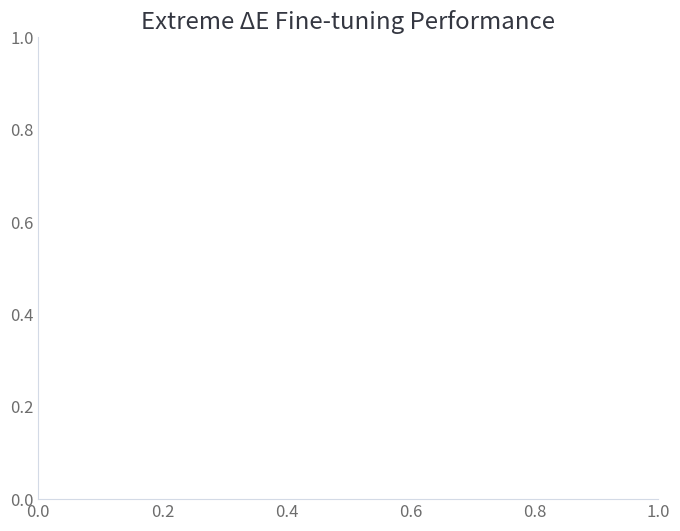

In [95]:
fig, ax = plt.subplots()
sns.barplot(staty.query('dataset == "Extreme ΔE" and last'), hue='sal', x='dataset_size', y='loss', legend=True, ax=ax)
ax.set_title('Extreme ΔE Fine-tuning Performance')
fig.savefig('figs/staty.png')

In [92]:
fig, ax = normal_plot(staty.query('fig and last and dataset_size != 256'))
# ax.set_title('Extreme ΔE Fine-Tuning')
fig.savefig('figs/normal_staty.png')

NameError: name 'staty' is not defined

In [ ]:

from pathlib import Path

from tomllib import load

res = []

for fn in Path('exps/results').glob('*.feather'):
    if 'early_stop' in fn.name:
        continue
    toml_fn = fn.with_suffix('.toml')
    with open(toml_fn, 'rb') as toml_f:
        toml = load(toml_f)
        res_df = pd.read_feather(fn)
        res_df['exp_id'] = fn.stem
        res_df['exp'] = toml['log']['exp_name']
        res_df['adv_data'] = toml.get('adv_train_data', 'Baseline')
        res_df['batch_size'] = toml['data']['batch_size']
        res_df['batch_num'] = toml['data']['num_sal_samples'] // res_df['batch_size']
        res_df['total_size'] = toml['data']['num_sal_samples']
        res_df['target'] = toml['target']['col_name']
        res_df['ema'] = pd.isna(res_df['Partial_train'])
        res.append(res_df)


res = pd.concat(res)

In [ ]:
res

epoch     Train  Partial_train    Rsplt1    Rsplt2    Rsplt3    Rsplt4  \
0        1  0.033593       0.169762  0.106492  0.105785  0.109878  0.111315   
1        2  0.027029       0.048250  0.097932  0.097250  0.101474  0.102999   
2        3  0.024405       0.037683  0.095890  0.095147  0.099427  0.100892   
3        4  0.022895       0.032993  0.094287  0.093459  0.097655  0.099223   
4        5  0.021416       0.033871  0.092455  0.091594  0.095807  0.097314   
..     ...       ...            ...       ...       ...       ...       ...   
260    261  0.022528       0.080532  0.085958  0.085859  0.089569  0.089701   
261    262  0.022179       0.079354  0.084630  0.083896  0.088061  0.088639   
262    263  0.021822       0.093903  0.089771  0.088124  0.092793  0.093498   
263    264  0.020975       0.087553  0.085934  0.084657  0.089305  0.089756   
264    265  0.022050            NaN  0.080339  0.079975  0.083461  0.084253   

       Rsplt5  Xshift_tsne  Xshift_umap  ...  rsplt_ave  Partial  \
0    0.110673     0.098757     0.128702  ...   0.108829      NaN   
1    0.102103     0.088735     0.118175  ...   0.100352      NaN   
2    0.099912     0.087223     0.115273  ...   0.098253      NaN   
3    0.098149     0.084806     0.113807  ...   0.096555      NaN   
4    0.096251     0.080575     0.108735  ...   0.094684      NaN   
..        ...          ...          ...  ...        ...      ...   
260  0.089591     0.043791     0.075409  ...   0.088136      NaN   
261  0.087841     0.042670     0.073951  ...   0.086613      NaN   
262  0.092357     0.045286     0.078905  ...   0.091309      NaN   
263  0.088966     0.044209     0.078081  ...   0.087724      NaN   
264  0.083348     0.041474     0.071169  ...   0.082275      NaN   

                  exp_id          exp     adv_data  batch_size  batch_num  \
0    delta_e_03-04-14-14     baseline     Baseline         256          4   
1    delta_e_03-04-14-14     baseline     Baseline         256          4   
2    delta_e_03-04-14-14     baseline     Baseline         256          4   
3    delta_e_03-04-14-14     baseline     Baseline         256          4   
4    delta_e_03-04-14-14     baseline     Baseline         256          4   
..                   ...          ...          ...         ...        ...   
260  delta_e_Xtsne_256x4  Xtsne_256x4  Xshift_tsne         256          4   
261  delta_e_Xtsne_256x4  Xtsne_256x4  Xshift_tsne         256          4   
262  delta_e_Xtsne_256x4  Xtsne_256x4  Xshift_tsne         256          4   
263  delta_e_Xtsne_256x4  Xtsne_256x4  Xshift_tsne         256          4   
264  delta_e_Xtsne_256x4  Xtsne_256x4  Xshift_tsne         256          4   

    total_size   target    ema  
0         1024  delta_e  False  
1         1024  delta_e  False  
2         1024  delta_e  False  
3         1024  delta_e  False  
4         1024  delta_e  False  
..         ...      ...    ...  
260       1024  delta_e  False  
261       1024  delta_e  False  
262       1024  delta_e  False  
263       1024  delta_e  False  
264       1024  delta_e   True  

[3993 rows x 25 columns]

(0.0, 0.2)

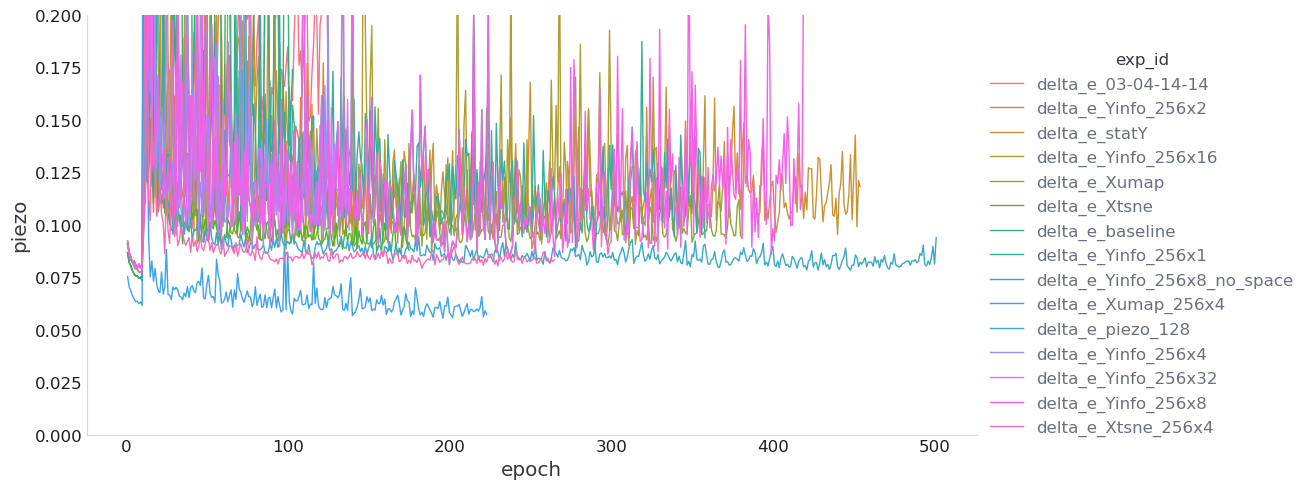

In [ ]:
sns.relplot(res, x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5, lw=1)
plt.ylim(0, 0.2)

In [ ]:
res.query('not ema').sort_values('infoY_delta_e', ascending=True).groupby('exp_id').first()[['infoY_delta_e', 'epoch', 'adv_data']]

infoY_delta_e  epoch       adv_data
exp_id                                                           
delta_e_03-04-14-14                0.044386     12       Baseline
delta_e_Xtsne                      0.041182     12    Xshift_tsne
delta_e_Xtsne_256x4                0.038342     21    Xshift_tsne
delta_e_Xumap                      0.037713     15    Xshift_umap
delta_e_Xumap_256x4                0.032853     31    Xshift_umap
delta_e_Yinfo_256x1                0.018155    341  infoY_delta_e
delta_e_Yinfo_256x16               0.009092    306  infoY_delta_e
delta_e_Yinfo_256x2                0.013415    141  infoY_delta_e
delta_e_Yinfo_256x32               0.006963    137  infoY_delta_e
delta_e_Yinfo_256x4                0.009238    131  infoY_delta_e
delta_e_Yinfo_256x8                0.007720    338  infoY_delta_e
delta_e_Yinfo_256x8_no_space       0.008127     92  infoY_delta_e
delta_e_baseline                   0.038185     25       Baseline
delta_e_piezo_128                  0.110336     28          piezo
delta_e_statY                      0.035392    241  statY_delta_e

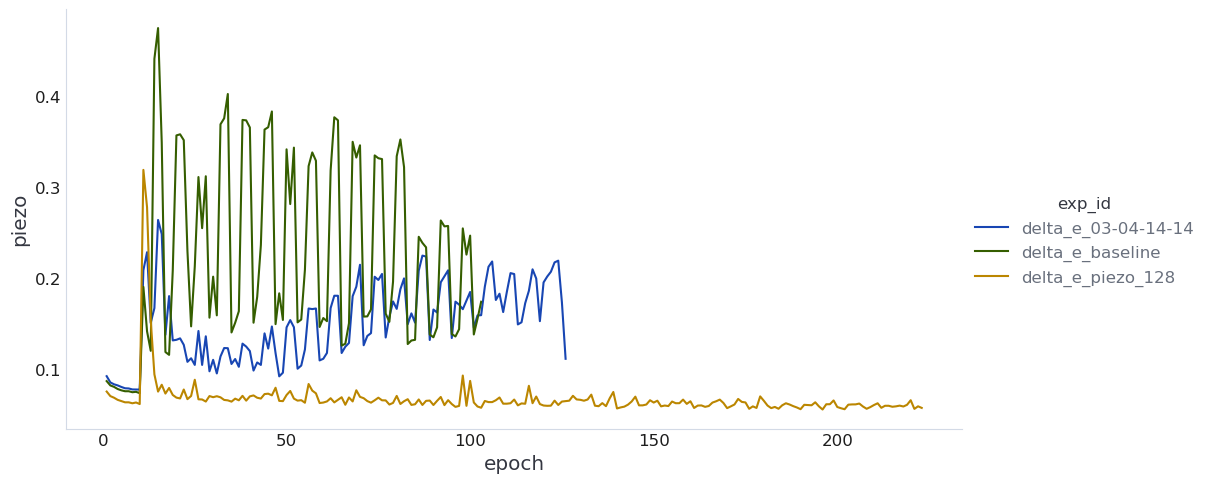

In [ ]:
sns.relplot(res.query('adv_data == "piezo" or adv_data == "Baseline"'), x='epoch', y='piezo', hue='exp_id', kind='line', aspect=2, height=5)

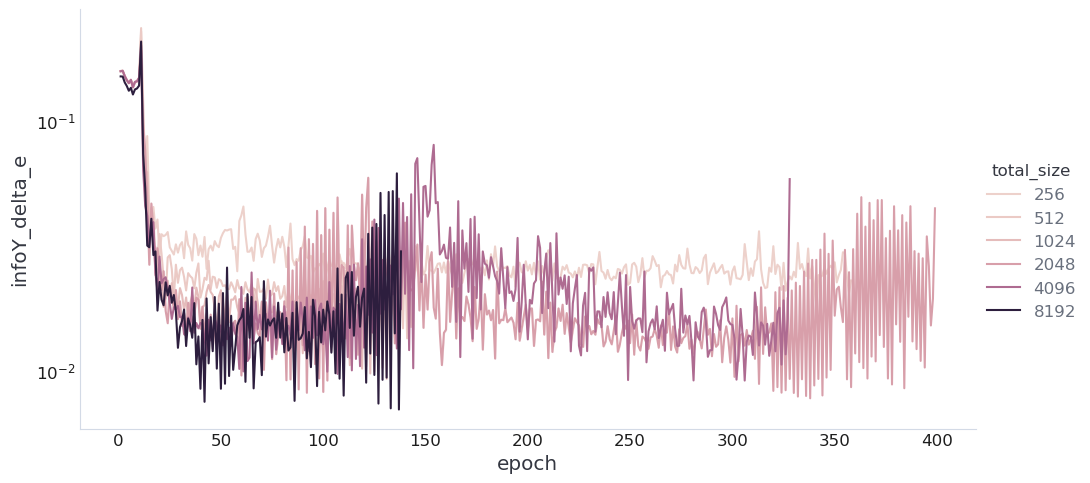

In [ ]:
infoy = res.query('adv_data == "infoY_delta_e" and epoch < 400')
sns.relplot(infoy, x='epoch', y='infoY_delta_e', hue='total_size', kind='line', aspect=2, height=5)
plt.yscale('log')

Change high-bandgap: make clear it's a dataset

Change gradient section

Change validation

bandgap plot

distribution loss

compare both models
